In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [20]:
%matplotlib inline

In [21]:
rhpass=pd.read_csv("filter-pass-rp.csv", parse_dates=['Time'])
rhpass.head()

,No.,Time,Source,Destination,Protocol,Length,Info
0,12,2011-11-04 21:04:51,10.10.10.15,10.10.10.5,FTP,66,Request: PASS rummy
1,25,2011-11-04 21:04:51,10.10.10.15,10.10.10.5,FTP,65,Request: PASS rump
2,38,2011-11-04 21:04:51,10.10.10.15,10.10.10.5,FTP,67,Request: PASS rumple
3,51,2011-11-04 21:04:51,10.10.10.15,10.10.10.5,FTP,67,Request: PASS rumpus
4,64,2011-11-04 21:04:51,10.10.10.15,10.10.10.5,FTP,64,Request: PASS run


In [22]:
rhpass["Type"] = rhpass.apply(lambda x: "Client" if x["Source"] == rhpass.irow(0)["Source"] else "Server", axis=1)

In [23]:
rhpass.head()

,No.,Time,Source,Destination,Protocol,Length,Info,Type
0,12,2011-11-04 21:04:51,10.10.10.15,10.10.10.5,FTP,66,Request: PASS rummy,Client
1,25,2011-11-04 21:04:51,10.10.10.15,10.10.10.5,FTP,65,Request: PASS rump,Client
2,38,2011-11-04 21:04:51,10.10.10.15,10.10.10.5,FTP,67,Request: PASS rumple,Client
3,51,2011-11-04 21:04:51,10.10.10.15,10.10.10.5,FTP,67,Request: PASS rumpus,Client
4,64,2011-11-04 21:04:51,10.10.10.15,10.10.10.5,FTP,64,Request: PASS run,Client


In [24]:
infodata2 = rhpass[['Length','Time','Info']]
infodata2.head()

,Length,Time,Info
0,66,2011-11-04 21:04:51,Request: PASS rummy
1,65,2011-11-04 21:04:51,Request: PASS rump
2,67,2011-11-04 21:04:51,Request: PASS rumple
3,67,2011-11-04 21:04:51,Request: PASS rumpus
4,64,2011-11-04 21:04:51,Request: PASS run


In [25]:
infodata2 = infodata2.set_index('Time')
infodata2.head()

,Length,Info
Time,,
2011-11-04 21:04:51,66,Request: PASS rummy
2011-11-04 21:04:51,65,Request: PASS rump
2011-11-04 21:04:51,67,Request: PASS rumple
2011-11-04 21:04:51,67,Request: PASS rumpus
2011-11-04 21:04:51,64,Request: PASS run


In [26]:
infodata2.resample('T',how=sum).head()

,Length
Time,
2011-11-04 21:04:00,2469
2011-11-04 21:05:00,17278
2011-11-04 21:06:00,17535
2011-11-04 21:07:00,17127
2011-11-04 21:08:00,17245


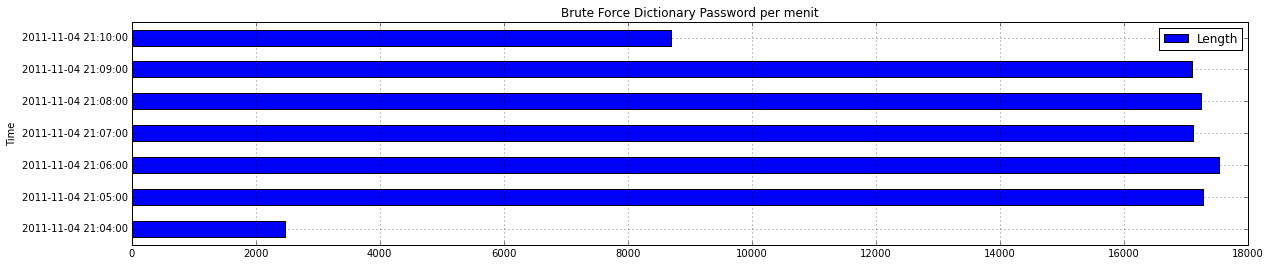

In [27]:
infodata2_plot = infodata2.resample('T',how=sum).plot(kind="barh",title="Brute Force Dictionary Password per menit",figsize=(20,4))

In [28]:
fig = infodata2_plot.get_figure()
fig.savefig("Brute-force-list-password-permenit.png")

In [29]:
infodata2.resample('S',how=sum).head()

,Length
Time,
2011-11-04 21:04:51,329
2011-11-04 21:04:52,137
2011-11-04 21:04:53,400
2011-11-04 21:04:54,264
2011-11-04 21:04:55,201


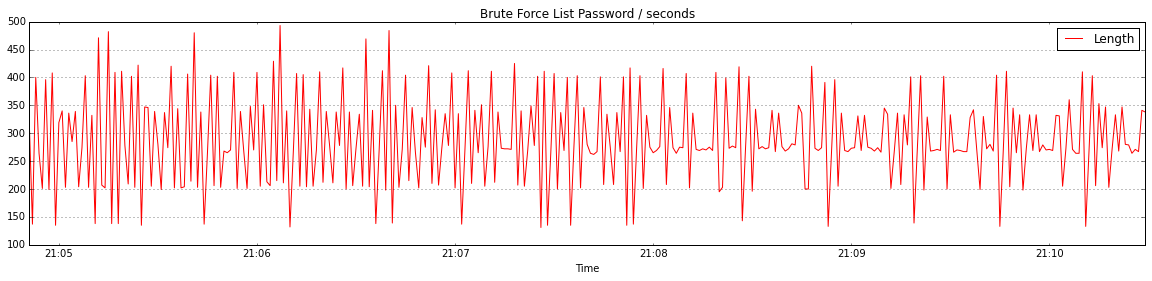

In [30]:
infodata2_plot = infodata2.resample('S',how=sum).plot(title="Brute Force List Password / seconds",style="r",figsize=(20,4),legend=True)

In [31]:
fig = infodata2_plot.get_figure()
fig.savefig("Brute-force-list-password-perseconds.png")

In [32]:
infodata2 = rhpass[['Source','Destination','Length','Info','Type']]
infodata2.head()

,Source,Destination,Length,Info,Type
0,10.10.10.15,10.10.10.5,66,Request: PASS rummy,Client
1,10.10.10.15,10.10.10.5,65,Request: PASS rump,Client
2,10.10.10.15,10.10.10.5,67,Request: PASS rumple,Client
3,10.10.10.15,10.10.10.5,67,Request: PASS rumpus,Client
4,10.10.10.15,10.10.10.5,64,Request: PASS run,Client


In [33]:
category_group=infodata2.groupby(['Source','Destination','Info']).sum()
category_group.head()

Length
Source      Destination Info                        
10.10.10.15 10.10.10.5  Request: PASS rummy       66
                        Request: PASS rump        65
                        Request: PASS rumple      67
                        Request: PASS rumpus      67
                        Request: PASS run         64